In [1]:
import librosa

In [2]:
import numpy as np
import csv
import librosa



import os
rows = []
genres = ['edm', 'classical', 'jazz', 'alternative']

# coded this so currGenre must match name of the directory :/

for currGenre in genres:
    for filename in os.listdir(currGenre):
        #get song
        audio_path = currGenre + '/' + filename
        print(audio_path)
        x , sr = librosa.load(audio_path, sr=44100)

        # 1 number of zero crossings
        zero_crossings = np.mean(librosa.zero_crossings(x))

        #2 spectral centroid
        spectral_centroids = np.mean(librosa.feature.spectral_centroid(x, sr=sr))

        #3 chroma
        chroma_stft = np.mean(librosa.feature.chroma_stft(x, sr=sr))


        #4 spectral bandwidth
        spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=x, sr=sr))


        #mfcc
        mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr))

        rows.append([zero_crossings, spec_bw, spectral_centroids, chroma_stft])

#put data in csv file
with open('data.csv', 'wt') as csvfile:
    csv_writer = csv.writer(csvfile)
 
    csv_writer.writerow(['zero crossing rate', 'spectral bandwidth', 'spectral centroid', 'chroma'])
 
    for row in rows:
        csv_writer.writerow(row)
        
        

edm/clarity_zedd.mp3
edm/A R I Z O N A - I Was Wrong.mp3
edm/Stephen - Crossfire.mp3
edm/Flight Facilities - Crave You (Adventure Club Dubstep Remix).mp3
edm/Uppermost - Beautiful Light.mp3
edm/born_mitiS.mp3
edm/shootingStars_bagRaiders.mp3
edm/AViVA - GRRRLS.mp3
edm/OceanBlue_WRLD.mp3
edm/TroyBoi - On My Own (feat. Nefera).mp3
edm/Crywolf - Eyes Half Closed.mp3
edm/Vanic X K.Flay - Cops.mp3
edm/Flume - Say It (feat. Tove Lo) (Illenium Remix).mp3
edm/Lauv - The Other (Official Lyric Video).mp3
edm/flicker_porterRobinson.mp3
edm/OMFG - I Love You.mp3
edm/Allie X - Paper Love.mp3
edm/Stephen - Play Me Like A Violin.mp3
edm/Oh Wonder - Technicolour Beat.mp3
edm/Coldplay - Midnight (Kygo Remix).mp3
classical/Franz Liszt - Liebestraum - Love Dream.mp3
classical/pachelbel's Canon in D--Soothing music(the best version).mp3
classical/rachmaninov-prelude-in-c-sharp-minor-youtubemp3free.org.mp3
classical/Vivaldi Concerto for 4 Violins in B minor RV 580.mp3
classical/Spring. Antonio Vivaldi.mp3


In [7]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
data['zero crossing rate']

0     0.058709
1     0.036765
2     0.061001
3     0.050577
4     0.048455
5     0.056846
6     0.069696
7     0.061251
8     0.044402
9     0.048218
10    0.079519
11    0.089002
12    0.055531
13    0.034043
14    0.073927
15    0.093176
16    0.045436
17    0.060856
18    0.032074
19    0.025882
20    0.022384
21    0.041650
22    0.025125
23    0.068397
24    0.069589
25    0.027576
26    0.021999
27    0.032005
28    0.035008
29    0.023065
        ...   
51    0.034984
52    0.016919
53    0.021844
54    0.027497
55    0.022458
56    0.027256
57    0.072995
58    0.043280
59    0.038226
60    0.021777
61    0.040818
62    0.058332
63    0.056368
64    0.054406
65    0.076551
66    0.043321
67    0.056607
68    0.053783
69    0.105421
70    0.079020
71    0.070696
72    0.041018
73    0.095297
74    0.064676
75    0.097698
76    0.048422
77    0.036697
78    0.053047
79    0.066858
80    0.058370
Name: zero crossing rate, Length: 81, dtype: float64

In [45]:
from sklearn.neighbors import KDTree

arr = np.array(data.values)

tree = KDTree(arr)

# r = 1.5 (means radius 1.5)
dist, ind = tree.query(arr[:1], k=4)
print(ind)  # indices of 2 closest neighbors
print(dist)  # distances to 2 closest neighbors

[[ 0 68 44 79]]
[[  0.         105.60454207 152.64659707 203.22113349]]


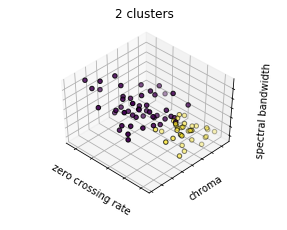

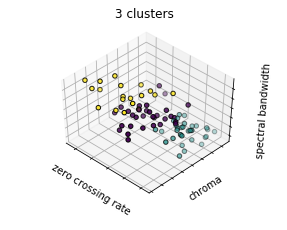

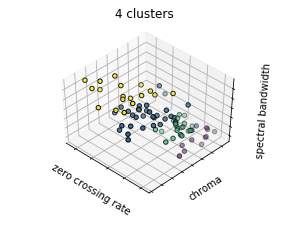

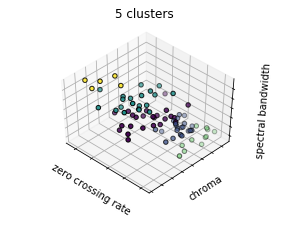

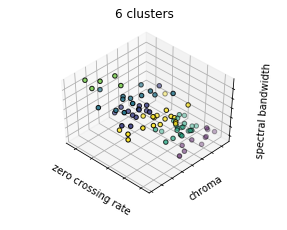

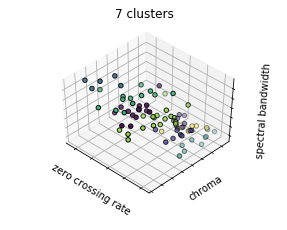

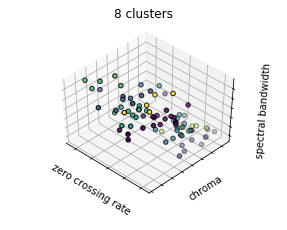

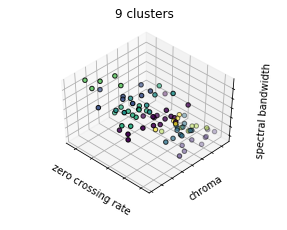

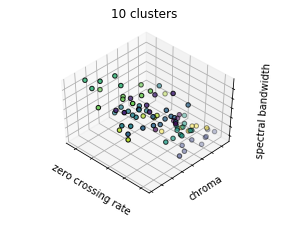

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


estimators = [KMeans(2), KMeans(3), KMeans(4), KMeans(5), KMeans(6), KMeans(7)
             , KMeans(8), KMeans(9), KMeans(10)]

titles = ['2 clusters', '3 clusters', '4 clusters', '5 clusters', '6 clusters',
         '7 clusters', '8 clusters', '9 clusters', '10 clusters']

sillhouette_scores = []

fignum = 1
for est, title in zip(estimators, titles):
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(data)
    labels = est.labels_
    
    silhouette_avg = silhouette_score(data, labels)
  
    sillhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    #sample_silhouette_values = silhouette_samples(X, labels)

    ax.scatter(data['zero crossing rate'], data['chroma'], data['spectral bandwidth'],
               c=labels.astype(np.float), edgecolor='k')
    
    #hide ticks cause annoying
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('zero crossing rate')
    ax.set_ylabel('chroma')
    ax.set_zlabel('spectral bandwidth')
    ax.set_title(title)
    ax.dist = 13
    fignum = fignum + 1
